## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
mouse_data= pd.merge(mouse_metadata,study_results, on="Mouse ID")

## Summary statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_data = mouse_data[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_regimen= mouse_data["Drug Regimen"].unique()

mean_tumorvolume = []
median_tumorvolume=[]
mode_tumorvolume=[]
var_tumorvolume=[]
std_tumorvolume=[]
sem_tumorvolume=[]
data_points=[]


for regimen in drug_regimen:
    data = drug_data.loc[(drug_data["Drug Regimen"]==regimen)]
    mean_tumorvolume.append(data["Tumor Volume (mm3)"].mean())    
    median_tumorvolume.append(data["Tumor Volume (mm3)"].median())
    mode_tumorvolume.append(st.mode(data["Tumor Volume (mm3)"]))
    var_tumorvolume.append(np.var((data["Tumor Volume (mm3)"])))
    std_tumorvolume.append(np.std((data["Tumor Volume (mm3)"])))
    sem_tumorvolume.append(data["Tumor Volume (mm3)"].sem())

summary_plot = pd.DataFrame({"Drug Regimen":drug_regimen,
                             "Mean Tumor Volume": mean_tumorvolume,
                             "Median Tumor Volume": median_tumorvolume,
                             "Mode Tumor Volume": mode_tumorvolume,
                             "Variance Tumor Volume": var_tumorvolume,
                             "Standard Deviation Tumor Volume": std_tumorvolume,
                             "Standard Error of the Mean": sem_tumorvolume})
summary_plot
    

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Mode Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error of the Mean
0,Ramicane,40.216745,40.673236,"([45.0], [25])",23.383692,4.835669,0.320955
1,Capomulin,40.675741,41.557809,"([45.0], [25])",24.839296,4.983904,0.329346
2,Infubinol,52.884795,51.820584,"([45.0], [25])",42.886388,6.548770,0.492236
3,Placebo,54.033581,52.288934,"([45.0], [25])",60.830138,7.799368,0.581331
4,Ceftamin,52.591172,51.776157,"([45.0], [25])",39.069446,6.250556,0.469821
5,Stelasyn,54.233149,52.431737,"([45.0], [24])",59.122106,7.689090,0.573111
6,Zoniferol,53.236507,51.818479,"([45.0], [25])",48.266689,6.947423,0.516398
7,Ketapril,55.235638,53.698743,"([45.0], [25])",68.188930,8.257659,0.603860
8,Propriva,52.322552,50.854632,"([45.0], [26])",42.088020,6.487528,0.512884
9,Naftisol,54.331565,52.509285,"([45.0], [25])",65.817708,8.112811,0.596466


## Bar plots

[Text(0, 0, 'Ramicane'),
 Text(0, 0, 'Capomulin'),
 Text(0, 0, 'Infubinol'),
 Text(0, 0, 'Placebo'),
 Text(0, 0, 'Ceftamin'),
 Text(0, 0, 'Stelasyn'),
 Text(0, 0, 'Zoniferol'),
 Text(0, 0, 'Ketapril'),
 Text(0, 0, 'Propriva'),
 Text(0, 0, 'Naftisol')]

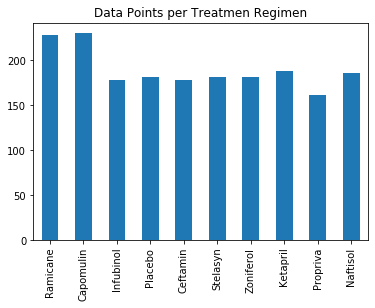

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
bar_pd =pd.DataFrame({"Drug Regimen": drug_regimen, "Number of Data Points": data_points})
bar_pd.plot(kind= "bar",legend=False, title="Data Points per Treatmen Regimen").set_xticklabels(drug_regimen, rotation="vertical")

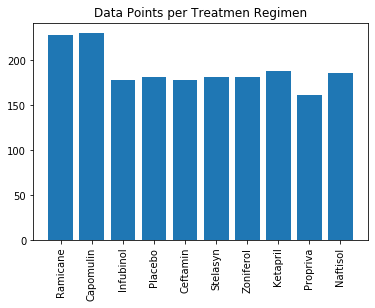

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(drug_regimen, data_points,align="center")
ticks= [value for value in drug_regimen]
plt.xticks(ticks, ticks, rotation= "vertical")
plt.title("Data Points per Treatmen Regimen")
plt.show()

## Pie plots

([<matplotlib.patches.Wedge at 0x14752f338d0>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

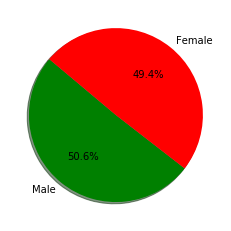

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
colors = ("green", "red")

plt.pie(sizes,labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=140)

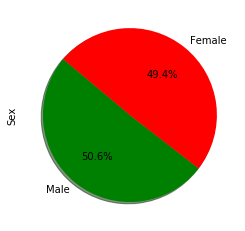

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#pie_pd= pd.DataFrame({"Sex": ("Male", "Female"), "Count": sizes})
#pie_pd.reset_index()
#pie_pd.plot(kind="pie", subplots= True)
sizes =mouse_data["Sex"].value_counts()
sizes.plot(kind= "pie",autopct="%1.1f%%", colors=colors, shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [10]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

new_mouse_data= mouse_data[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]

prominent_regimens = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
regi=[]
ids=[]
final_tumorvolume=[]

for regimen in prominent_regimens:
    data = new_mouse_data.loc[(new_mouse_data["Drug Regimen"]==regimen)]
    mouse_ids = data["Mouse ID"].unique()
    for mouse in mouse_ids:
        data2= data.loc[(data["Mouse ID"])==mouse]
        regi.append(data2["Drug Regimen"].iloc[-1])
        ids.append(data2["Mouse ID"].iloc[-1])
        final_tumorvolume.append(data2["Tumor Volume (mm3)"].iloc[-1])
        
final_volumes_pd= pd.DataFrame({"Mouse ID": ids, "Regimen": regi, "Final Tumor Volume": final_tumorvolume})
final_volumes_pd=final_volumes_pd.sort_values(["Regimen"]).reset_index(drop=True)

capomulin = final_volumes_pd.loc[(final_volumes_pd["Regimen"]== "Capomulin")]
ramicane = final_volumes_pd.loc[(final_volumes_pd["Regimen"]== "Ramicane")]
infubinol = final_volumes_pd.loc[(final_volumes_pd["Regimen"]== "Infubinol")]
ceftamin = final_volumes_pd.loc[(final_volumes_pd["Regimen"]== "Ceftamin")]

ceftamin.reset_index(drop=True)
del ceftamin["Regimen"]
capomulin.reset_index(drop=True)
del capomulin["Regimen"]
ramicane.reset_index(drop=True)
del ramicane["Regimen"]
infubinol.reset_index(drop=True)
del infubinol["Regimen"]

In [21]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_ce = ceftamin["Final Tumor Volume"].quantile([.25,.5,.75])
lowerq_ce = quartiles_ce[0.25]
upperq_ce = quartiles_ce[0.75]
iqr_ce = upperq_ce-lowerq_ce

quartiles_ca = capomulin["Final Tumor Volume"].quantile([.25,.5,.75])
lowerq_ca = quartiles_ca[0.25]
upperq_ca = quartiles_ca[0.75]
iqr_ca = upperq_ca-lowerq_ca

quartiles_ra = ramicane["Final Tumor Volume"].quantile([.25,.5,.75])
lowerq_ra = quartiles_ra[0.25]
upperq_ra = quartiles_ra[0.75]
iqr_ra = upperq_ra-lowerq_ra

quartiles_in = infubinol["Final Tumor Volume"].quantile([.25,.5,.75])
lowerq_in = quartiles_in[0.25]
upperq_in = quartiles_in[0.75]
iqr_in = upperq_in-lowerq_in

48.72207785

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

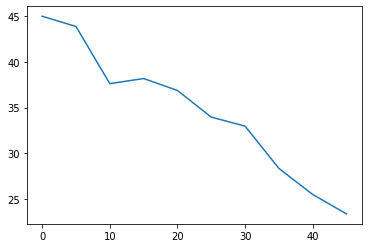

In [13]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
data3= mouse_data[mouse_data["Mouse ID"]=="s185"]
x_axis= data3["Timepoint"]
y_axis= data3["Tumor Volume (mm3)"]
plt.plot(x_axis, y_axis)

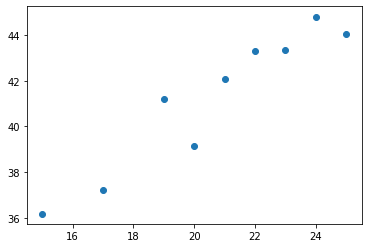

In [14]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
data4= mouse_data[mouse_data["Drug Regimen"]=="Capomulin"]
x_axis= data4["Weight (g)"].unique()
y_axis=[]
for weight in x_axis:
    data5= data4.loc[data4["Weight (g)"]== weight]
    y_axis.append(data5["Tumor Volume (mm3)"].mean())
plt.scatter(x_axis, y_axis)

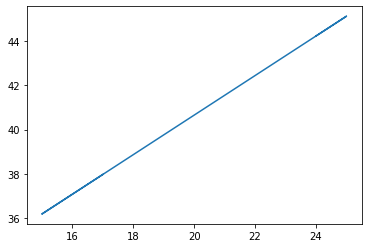

In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation= st.pearsonr(x_axis,y_axis)
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis,y_axis)
regres_values= x_axis*slope + intercept
plt.plot(x_axis, regres_values)
